# Crime clustering 


## Data

* **ENTITY_CODE** : ID Number.
* **STATE** : State's name.
* **ID** : Official name's abbreviation.
* **HOMICIDES*** : The act of one human killing another.
* **CAR_THEFT*** : Total or partial theft of vehicle.
* **EXTORTION*** : Intimidation to perform an act to the detriment of your patrimony.
* **STREET_TRANSPORT_THEFT*** : Robbery/Theft or assault on the street or public transportation.
* **HOME_THEFT*** : Home theft.
* **FRAUD*** : Delivery of money for a product or service that was not received as agreed.
* **POPULATION** : Total number of inhabitants in the entity$^{4}$.
* **URBAN_PP** : Percentage of urban population$^{4}$.

_* Crime prevalence rate by state per hundred thousand inhabitants_
https://github.com/isaacarroyov/crime_analysis_mx2017

## Exploratory Data Analysis

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import the csv as a Data Frame
df = pd.read_csv('crimes_mx.csv', encoding='ISO-8859-1')
df.head(10)

,ENTITY_CODE,STATE,ID,HOMICIDES,CAR_THEFT,EXTORTION,STREET_TRANSPORT_THEFT,HOME_THEFT,FRAUD,POPULATION,URBAN_PP
0,1,AGUASCALIENTES,AS,83,17547,5188,4973,7823,3677,1321453,0.808277
1,2,BAJACALIFORNIA,BC,2144,17349,4965,4977,11665,4953,3584605,0.922662
2,3,BAJACALIFORNIASUR,BS,740,9803,3394,1522,7931,3559,809833,0.860283
3,4,CAMPECHE,CC,76,6459,3128,4104,6522,3625,935047,0.745742
4,5,COAHUILADEZARAGOZA,CL,273,6204,3534,3083,4415,4645,3029740,0.899927
5,6,COLIMA,CM,848,6594,5333,2430,6156,3193,747801,0.887692
6,7,CHIAPAS,CS,593,2391,2937,4199,4696,2067,5382083,0.487281
7,8,CHIHUAHUA,CH,2221,8261,5282,3603,5306,3628,3782018,0.848209
8,9,CIUDADDEMÉXICO,DF,1315,15917,6359,19325,4442,6618,8811266,0.995368
9,10,DURANGO,DG,197,6117,4448,2401,3051,3094,1799320,0.688725


In [3]:
#number of columns and rows 
df.shape

(32, 11)

In [4]:
#name of the columns
df.columns

Index(['ENTITY_CODE', 'STATE', 'ID', 'HOMICIDES', 'CAR_THEFT', 'EXTORTION',
       'STREET_TRANSPORT_THEFT', 'HOME_THEFT', 'FRAUD', 'POPULATION',
       'URBAN_PP'],
      dtype='object')

A statistical summary of the data is shown below.

In [5]:
#relevant stats ordered in descending order (by the mean)
df.describe().transpose().iloc[1:].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
POPULATION,32.0,3.859946e+06,3.291501e+06,747801.000000,1.765657e+06,3.020775e+06,4.800992e+06,1.736339e+07
CAR_THEFT,32.0,8.371594e+03,4.043664e+03,2391.000000,6.006750e+03,7.125500e+03,1.013125e+04,1.754700e+04
STREET_TRANSPORT_THEFT,32.0,5.811344e+03,4.663878e+03,1522.000000,3.056000e+03,4.339000e+03,6.398250e+03,2.306100e+04
EXTORTION,32.0,5.607594e+03,2.615813e+03,2300.000000,3.403000e+03,5.076500e+03,7.119250e+03,1.245900e+04
HOME_THEFT,32.0,5.519844e+03,1.879006e+03,3051.000000,4.186500e+03,5.345500e+03,6.441000e+03,1.166500e+04
FRAUD,32.0,3.833781e+03,1.312222e+03,2032.000000,2.916250e+03,3.607000e+03,4.899750e+03,6.983000e+03
HOMICIDES,32.0,9.741875e+02,8.048474e+02,50.000000,4.077500e+02,7.155000e+02,1.561750e+03,3.046000e+03
URBAN_PP,32.0,7.545198e-01,1.411152e-01,0.473297,6.746285e-01,7.723578e-01,8.669857e-01,9.953678e-01


### Data distribution

As part of the analysis, the distribution of the variables will be shown through histograms.

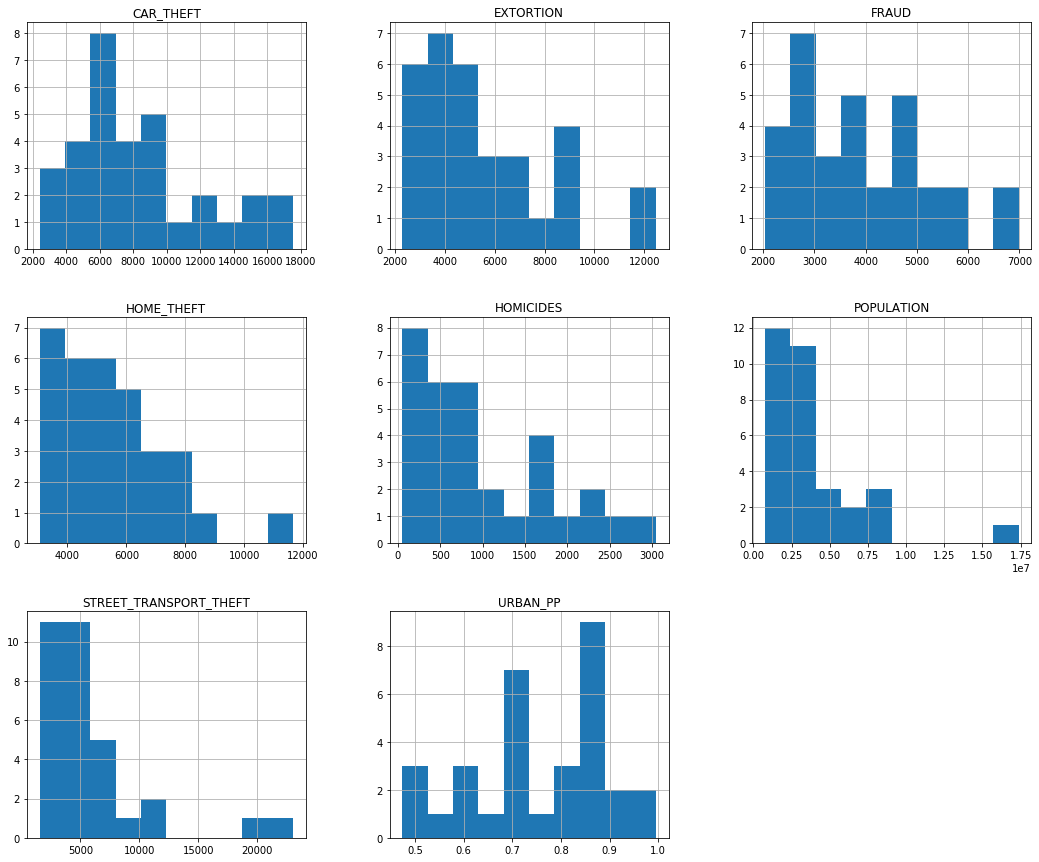

In [6]:
df.iloc[:,3:].hist( figsize=(18,15) )
plt.show()

### Bar charts

An interesting analysis is to show the different distributions of variables by state

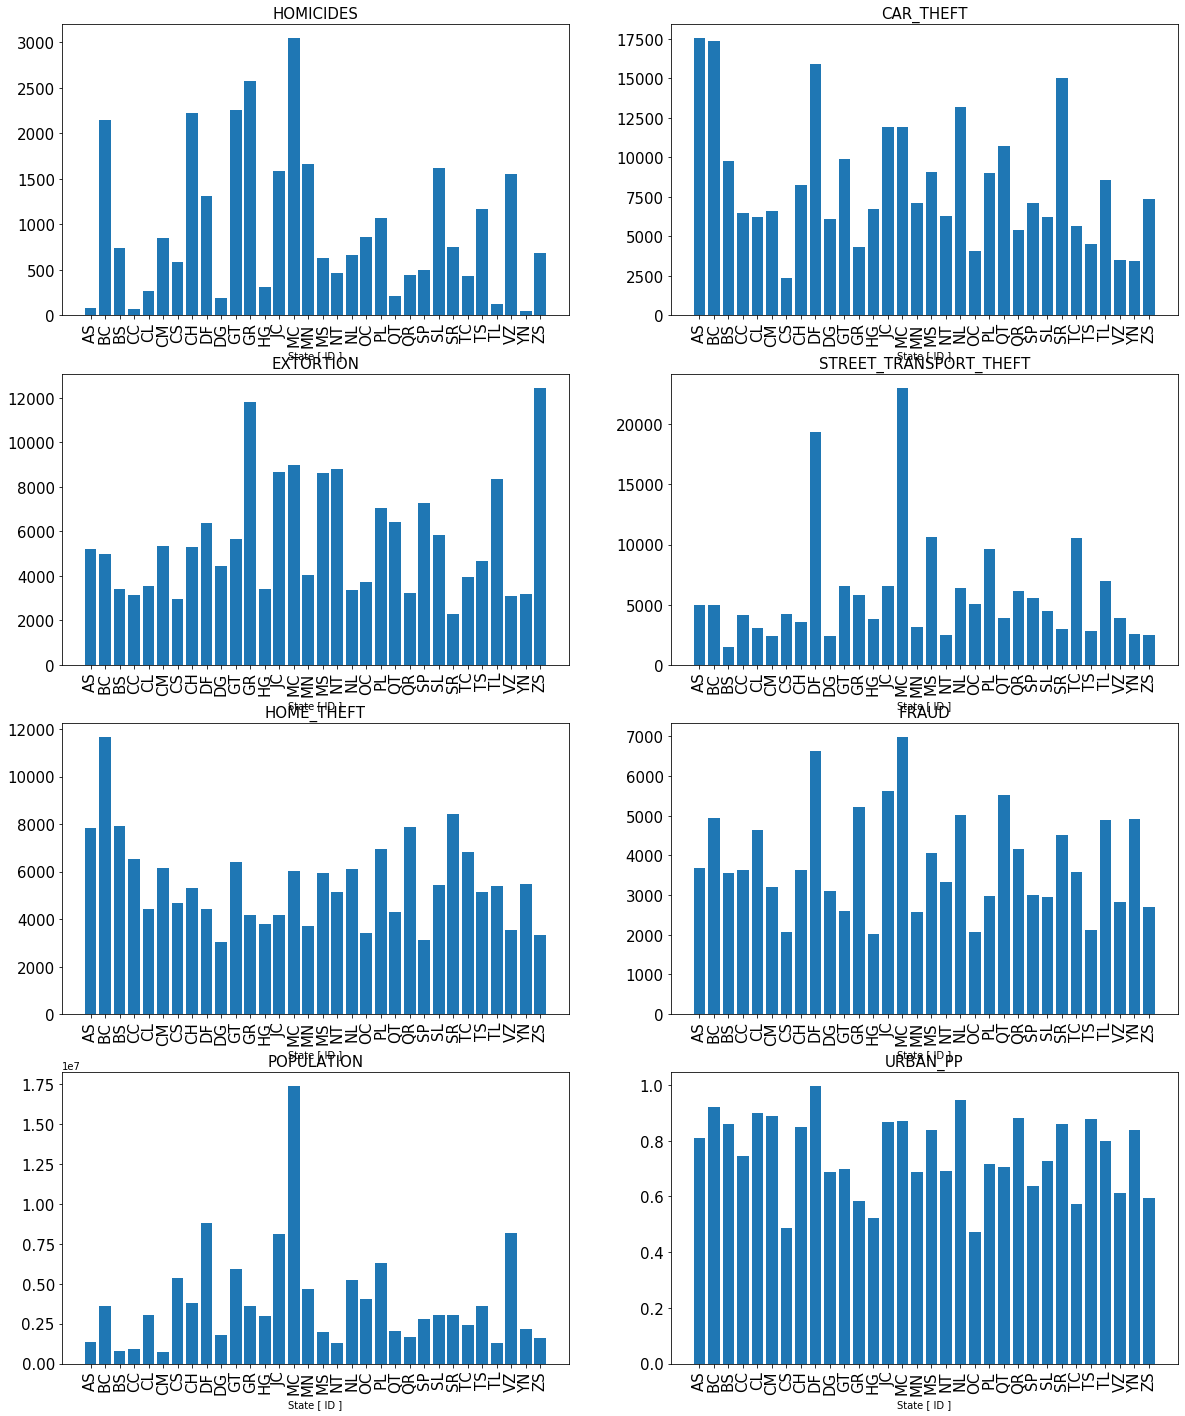

In [7]:
variables = df.columns.values[3:]

plt.figure( figsize=(20,20) )


for i in range(len(variables)):

    col_name=variables[i]

    plt.subplot( 4, 2, i+1 )
    plt.bar( df['ID'], df[col_name])
    
    #add title and labels on the axes
    plt.title( col_name, size = 15 )
    plt.xlabel( 'State [ ID ]', size = 10 )
    plt.xticks( rotation = 90 )
    plt.tick_params( labelsize = 15 )
    plt.subplots_adjust( bottom= -0.05)

plt.show()

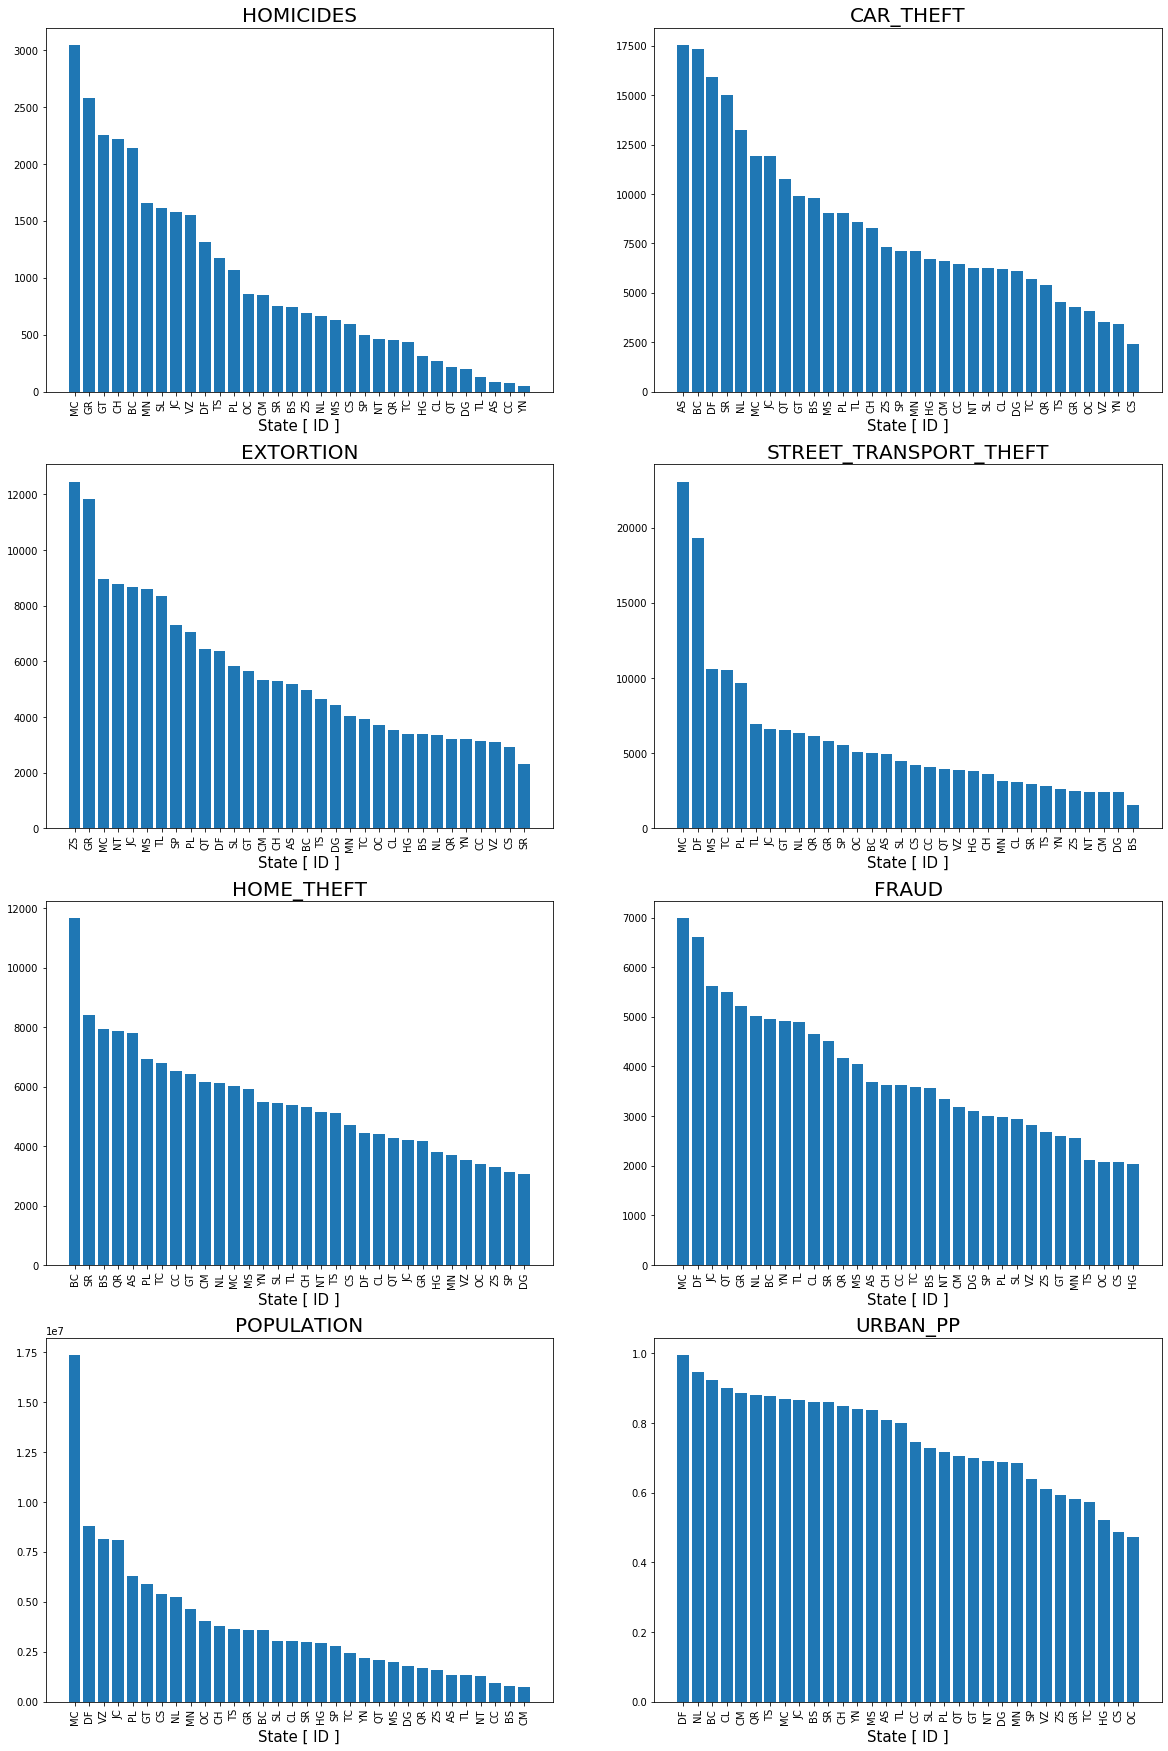

In [8]:

#titles 
titles = ['Crimes by State. \nType: Homicides',
           'Crimes by State. \nType: Car theft', 'Crimes by State. \nType: Extortion',
           'Crimes by State. \nType: Theft/Assault on the street or public transportation', 
           'Crimes by State. \nType: Home theft', 'Crimes by State. \nType: Fraud',
          ]


#dropped 'POBLACION' and 'PP_URBANA' in order to have the crime variables
variables = df.columns.values[3:]

#create a figure
plt.figure( figsize=(20,25) )


for i in range(len(variables)):

    col_name=variables[i]
    df_i = df.sort_values( by = col_name, ascending = False )

    #create a subplot
    plt.subplot( 4, 2, i+1 )

    #make the bar chart
    plt.bar( df_i['ID'], df_i[col_name])
    
    #add title and labels on the axes
    plt.title( col_name, size = 20 )
    plt.xlabel( 'State [ ID ]', size = 15 )
    plt.xticks( rotation = 90 )
    plt.tick_params( labelsize = 10)

#adjust subplots
plt.subplots_adjust(bottom=-0.05)
plt.show()

### Correlation of the variables

For this analysis only the most important variables will be taken, these are:

1. **CAR_THEFT**
2. **STREET_TRANSPORT_THEFT**
3. **EXTORTION**
4. **HOMICIDES**

The correlation between these four variables will be shown below for a better perspective of the problem:

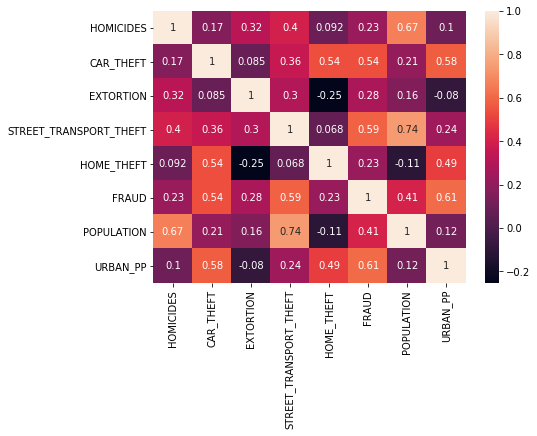

In [9]:
plt.figure( figsize=(7,5))

sns.heatmap( df[variables].corr().round(3), annot = True  )
plt.xticks( rotation = 90 )
plt.yticks( rotation = 0 )

plt.show()

## Standardization

In [10]:
#Here we standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.
from sklearn import preprocessing
df_standardized = preprocessing.scale( df[variables] )
df_standardized = pd.DataFrame( df_standardized )

## Distorsion

In [11]:
from sklearn.cluster import KMeans 

inertia = []

max_k=20

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)


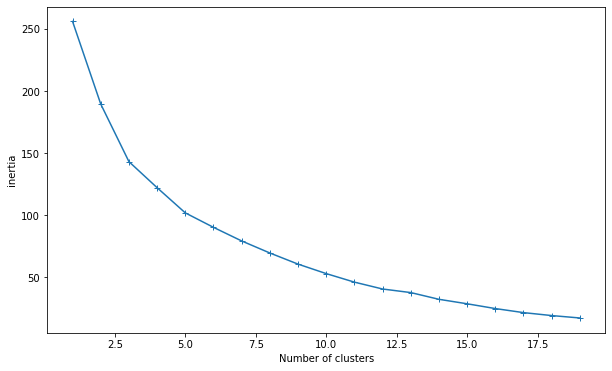

In [12]:
plt.figure( figsize=(10,6))

plt.plot(range(1, max_k), inertia,   marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.tick_params( labelsize = 10 )

plt.show()

###  Silhouette 

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
silhouette_score(df_standardized,  kmeans.labels_)

0.1399820824673565

In [15]:
sil=[]
for i in range(3,max_k):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(df_standardized)
    sil_score=silhouette_score(df_standardized,  kmeans.labels_)
    sil.append(sil_score) 
    

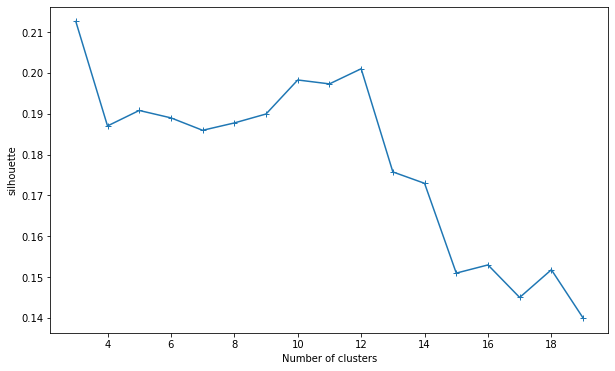

In [16]:
plt.figure( figsize=(10,6))

plt.plot(range(3, max_k), sil,   marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.tick_params( labelsize = 10 )

plt.show()

## Clustering  

In [17]:
#Use of n_clusters = 5
kmeans = KMeans( n_clusters=5, init='k-means++', random_state=11 )

#train and prediction on our normalized data
predicted_y = kmeans.fit_predict( df_standardized )

#numbers of cluster goes from 0 to 4, we're adding +1 to the array
predicted_y = predicted_y + 1 

predicted_y

array([4, 4, 5, 5, 5, 5, 1, 5, 3, 1, 5, 2, 1, 2, 3, 1, 2, 2, 4, 1, 2, 2,
       5, 1, 5, 4, 1, 5, 2, 1, 5, 2], dtype=int32)

In [18]:
df['CLUSTER'] = predicted_y
df[ ['CLUSTER', 'STATE'] ]

,CLUSTER,STATE
0,4,AGUASCALIENTES
1,4,BAJACALIFORNIA
2,5,BAJACALIFORNIASUR
3,5,CAMPECHE
4,5,COAHUILADEZARAGOZA
5,5,COLIMA
6,1,CHIAPAS
7,5,CHIHUAHUA
8,3,CIUDADDEMÉXICO
9,1,DURANGO


## Analysis of the output

### Distribution of the variables

The following graph shows the correlation of each of the selected variables and each of the _clusters_ in colour.

In [19]:
df.head()

,ENTITY_CODE,STATE,ID,HOMICIDES,CAR_THEFT,EXTORTION,STREET_TRANSPORT_THEFT,HOME_THEFT,FRAUD,POPULATION,URBAN_PP,CLUSTER
0,1,AGUASCALIENTES,AS,83,17547,5188,4973,7823,3677,1321453,0.808277,4
1,2,BAJACALIFORNIA,BC,2144,17349,4965,4977,11665,4953,3584605,0.922662,4
2,3,BAJACALIFORNIASUR,BS,740,9803,3394,1522,7931,3559,809833,0.860283,5
3,4,CAMPECHE,CC,76,6459,3128,4104,6522,3625,935047,0.745742,5
4,5,COAHUILADEZARAGOZA,CL,273,6204,3534,3083,4415,4645,3029740,0.899927,5


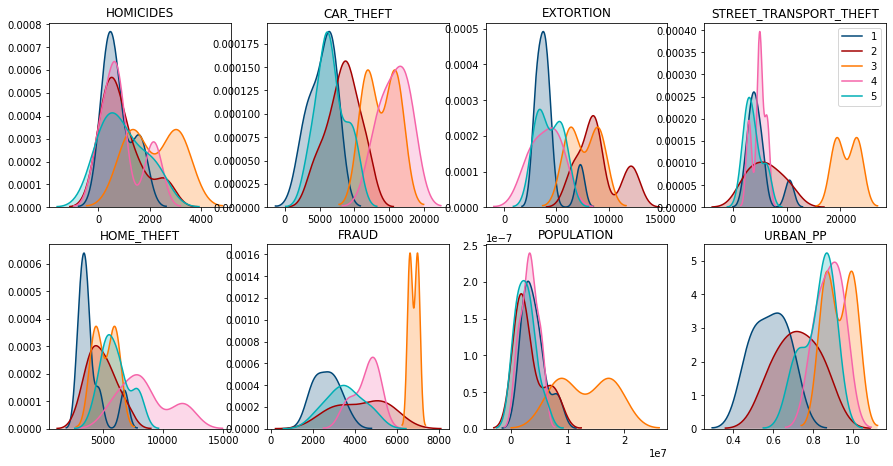

In [20]:
colours_cluster = ['#004777', '#A30000', '#FF7700','#F564A9', '#00AFB5']

plt.subplots(2, 4,figsize=(15,3)  )
for i, col in enumerate(df.columns[3:-1]):
    plt.subplot(2,4, i+1)
    for j in range(1,6):
        sns.kdeplot(df.loc[df['CLUSTER'] == j, col], shade=True, label=j, color=colours_cluster[j-1])
    plt.title(col)
    if i == 3:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()
        
plt.subplots_adjust(bottom=-1)


- CLUSTER 1: rural - safe
- CLUSTER 2: semi-rural - extorsion 
- CLUSTER 3: big urban  - fraud, street theft, homicides
- CLUSTER 4: urban - home/car theft
- CLUSTER 5: urban - safe (homicide big variance)

### Geographical position

In [21]:
df_dict = df.set_index( 'ID' )['CLUSTER']

states_geo = 'states_mx.json'

#use folium to create map
import folium
map_mex = folium.Map( location = [24,-102], zoom_start = 4.5 )

#colour a state according to its cluster
def my_color_function(feature):
    if df_dict[feature['id']] == 1:
        return colours_cluster[0]
    elif df_dict[feature['id']] == 2:
        return colours_cluster[1]
    elif df_dict[feature['id']] == 3:
        return colours_cluster[2]
    elif df_dict[feature['id']] == 4:
        return colours_cluster[3]
    elif df_dict[feature['id']] == 5:
        return colours_cluster[4]

In [48]:
for i in range(1):
    folium.GeoJson(
        states_geo,
        style_function=lambda feature: {
            'fillColor': my_color_function(feature),
            'color' : 'black',
            'fill_opacity' : .5,
            'weight' : 0.5,
            }
        ).add_to(map_mex)

map_mex

![GDP_per_capita](Mexico_GDP_per_capita_2012.png)